# Medical Cost Personal Datasets

Dataset at kaggle -> [link](https://www.kaggle.com/datasets/mirichoi0218/insurance)

Dataset at github -> [link](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)

## About Dataset
age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [7]:
### Importing libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
target = df.charges

In [12]:
df.drop(columns=['charges'],inplace=True)

In [15]:
cat_col = df.select_dtypes(include='object').columns

In [17]:
num_col = df.select_dtypes(exclude='object').columns

In [19]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [22]:
## creating pipelines
num_pipeline = Pipeline([("Imputer",SimpleImputer(strategy="mean")),
                          ("Scaler",StandardScaler())])
cat_pipeline = Pipeline([("Imputer",SimpleImputer(strategy="most_frequent")),
                         ("OneHot",OneHotEncoder())])
ct = ColumnTransformer([("Num_pipeline",num_pipeline,num_col),
                        ("Cat_pipeline",cat_pipeline,cat_col)])

In [61]:
cat_pipe = Pipeline([("impute",SimpleImputer(strategy="most_frequent")),
                     ("onehot",OneHotEncoder())])
num_pipe = Pipeline([("impute",SimpleImputer(strategy="mean")),
                     ("scaler",MinMaxScaler())])
ct1 = ColumnTransformer([("cat",cat_pipe,cat_col),
                         ("num",num_pipe,num_col)])

In [74]:
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.2,random_state=73)

In [75]:
x_train = ct.fit_transform(x_train)
#x_train = ct1.fit_transform(x_train)

In [76]:
x_test = ct.transform(x_test)
#x_test = ct1.transform(x_test)

In [77]:
x_train[0]

array([0.97073578, 0.24286369, 0.74332572, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [78]:
x_train = tf.constant(x_train)
x_test = tf.constant(x_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [79]:
x_train[0].shape

TensorShape([11])

In [80]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.SGD(),
    metrics = "mae"
)

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                120       
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
from tensorflow.keras.utils import plot_model

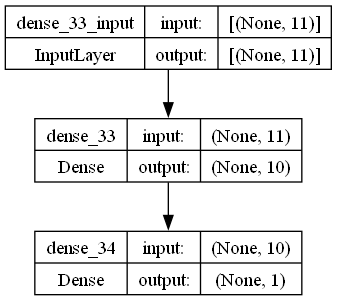

In [82]:
plot_model(model=model,show_shapes=True)

In [83]:
hist = model.fit(x_train,y_train,epochs=50,verbose=0)

In [84]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3916.4524 - mae: 3916.4524


[3916.452392578125, 3916.452392578125]

In [85]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = "mae"
)

model.summary()

hist1 = model.fit(x_train,y_train,epochs=200,verbose=0)
model.evaluate(x_test,y_test)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 50)                600       
                                                                 
 dense_36 (Dense)            (None, 50)                2550      
                                                                 
 dense_37 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
9/9 [==============================] - 0s 1ms/step - loss: 3897.6680 - mae: 3897.6680


[3897.66796875, 3897.66796875]

In [86]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,input_shape=x_train[0].shape))
#model.add(tf.keras.layers.Dense(50,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

hist = model.fit(x_train,y_train,epochs=100,verbose=0)
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3208.1274 - mae: 3208.1274


[3208.12744140625, 3208.12744140625]

<Axes: >

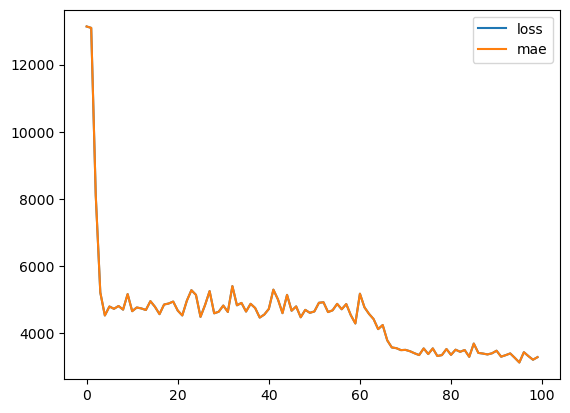

In [87]:
pd.DataFrame(hist.history).plot()

In [88]:
t =pd.DataFrame(hist.history)
t.head()

,loss,mae
0,13134.821289,13134.821289
1,13092.666016,13092.666016
2,8108.271973,8108.271973
3,5220.022461,5220.022461
4,4536.131836,4536.131836


In [59]:
## Earlystopping callbacks